In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\CarPrice_Assignment - CarPrice_Assignment.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [6]:
df.drop(columns = ['car_ID', 'symboling', 'CarName'], inplace = True)

In [9]:
# replacements = {'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two' : 2, 'twelve' : 12, 'three' : 3}
df['cylindernumber'] = df['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two' : 2, 'twelve' : 12, 'three' : 3}).astype('int64')

C:\Users\User\AppData\Local\Temp\ipykernel_1420\2316725412.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cylindernumber'] = df['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two' : 2, 'twelve' : 12, 'three' : 3}).astype('int64')


In [10]:
df['doornumber'] = df['doornumber'].replace({'four':4, 'two' : 2}).astype('int64')

<Axes: >

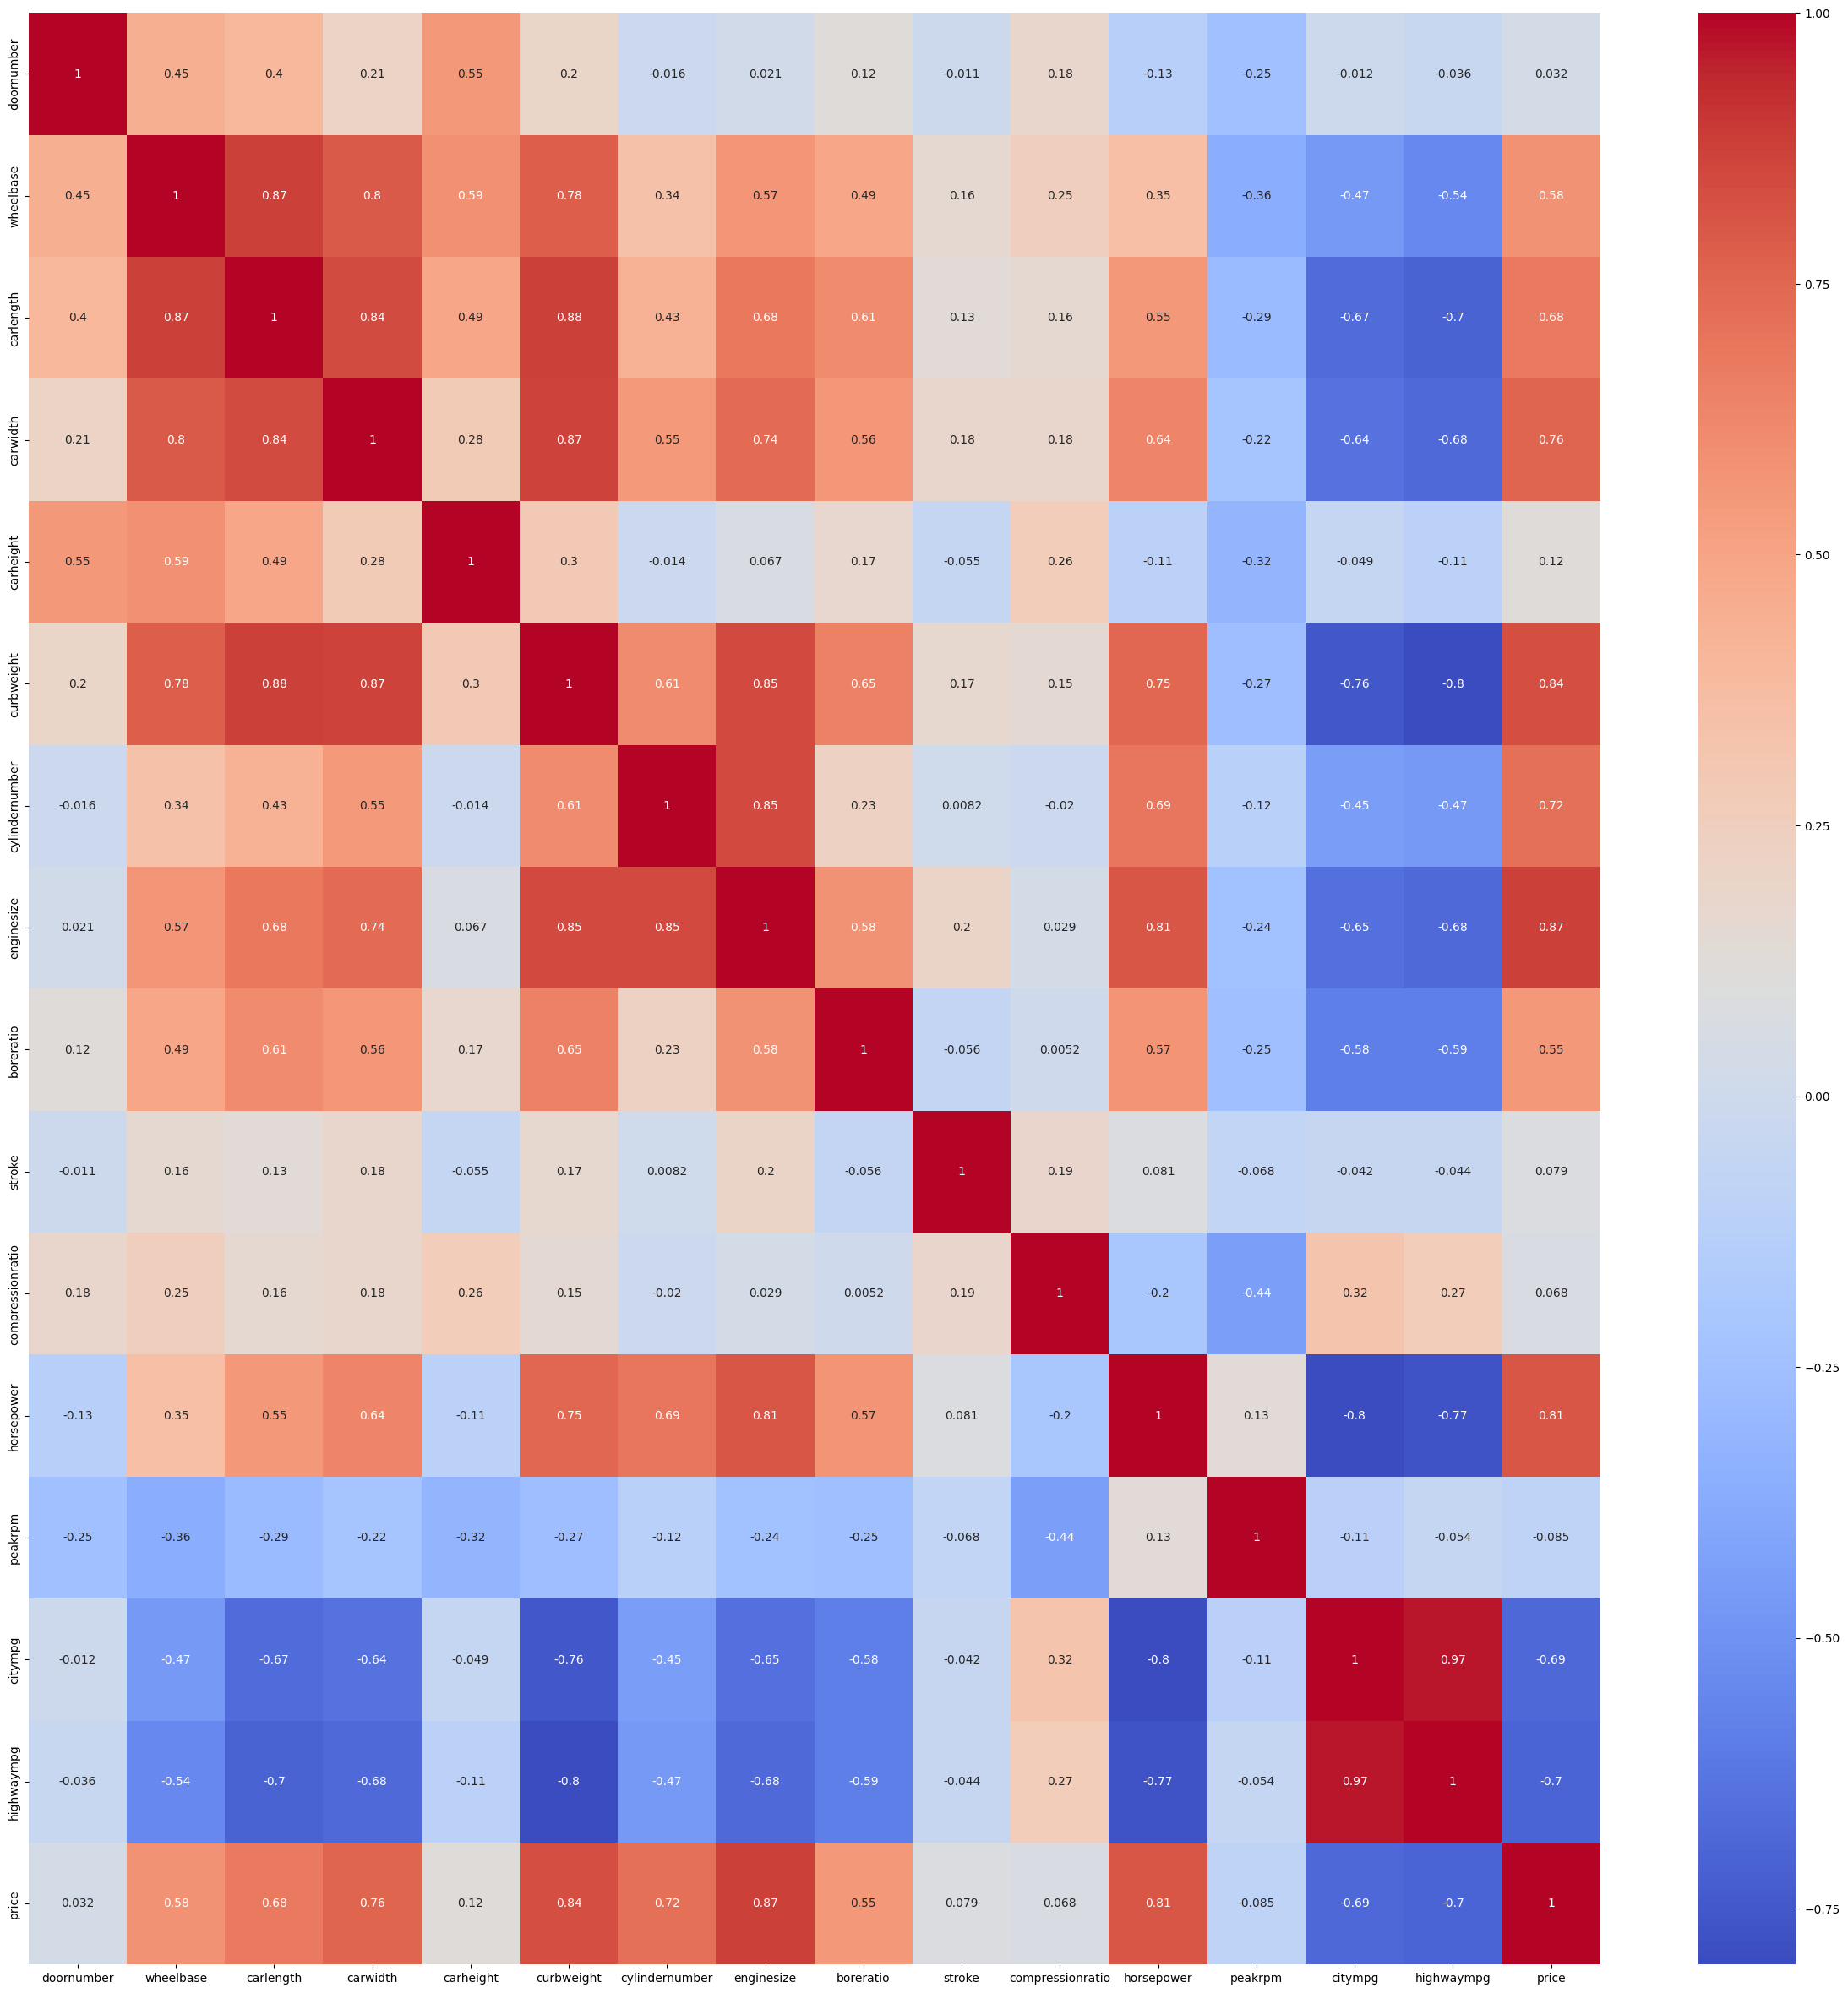

In [12]:
correlation_matrix = df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

In [19]:
highly_correlated_features = correlation_matrix['price'][
    (correlation_matrix['price'].abs() > 0.5) & 
    (correlation_matrix['price'] != 1)
].index.tolist()

In [ ]:
# correlation_matrix['price'].sort_values(ascending=False)

In [18]:
highly_correlated_features

['carlength',
 'carwidth',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg']

In [20]:
cat_features = df.select_dtypes(include=[np.object_]).columns.tolist()  

In [29]:
cat_features

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem']

In [37]:
final_columns = highly_correlated_features + cat_features + ['price'] 

In [38]:
final_columns

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem',
 'price']

In [39]:
car_df = df[final_columns]

In [40]:
car_df = pd.get_dummies(car_df,columns=cat_features,drop_first=True,dtype='int64')      #get more col by cat 0, 1 for Y/N ; OneHot encoding

In [41]:
car_df

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,6,152,2.68,154,19,26,...,0,1,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,4,109,3.19,102,24,30,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,5,136,3.19,115,18,22,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,4,141,3.78,114,23,28,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,3049,4,141,3.78,160,19,25,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,3012,6,173,3.58,134,18,23,...,0,1,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,3217,6,145,3.01,106,26,27,...,0,0,0,0,0,1,0,0,0,0


In [47]:
cols = df.columns.tolist()
print(cols)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [54]:
x = car_df.drop(['price'],axis = 1)                                                     #axis y:0, x:1
y = car_df[['price']]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)   

In [56]:
print(f'Train features (x) = ',X_train.shape)
print(f'Train features (y) = ',y_train.shape)

Train features (x) =  (164, 32)
Train features (y) =  (164, 1)


In [65]:
scale = StandardScaler()
x_train_sc = scale.fit_transform(X_train)
x_test_sc = scale.transform(X_test)

In [66]:
model = LinearRegression()
model.fit(x_train_sc,y_train)

LinearRegression()

In [67]:
y_train_pred = model.predict(x_train_sc)
y_test_pred = model.predict(x_test_sc)

In [69]:
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print(f' R2 Train = {r2_train:.2f} R2 TEST = {r2_test:.2f}')

mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
print(f' MSE Train = {mse_train:.2f} MSE TEST = {mse_test:.2f}')

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f' MSE Train = {rmse_train:.2f} MSE TEST = {rmse_test:.2f}')

 R2 Train = 0.94 R2 TEST = 0.76
 MSE Train = 3787851.48 MSE TEST = 18704223.18
 MSE Train = 1946.24 MSE TEST = 4324.84
